# Anomalies in RU2020 vote

Good map of regions:
https://regnum.ru/uploads/pictures/news/2019/03/11/regnum_picture_15523183991313502_normal.png

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cleaned.csv')
df['turnout'] = df['given']/np.maximum(1, df['nominal'])
df['support'] = df['yes']/np.maximum(1, df['given'])
df.head()

,region,tik,uik,nominal,given,received,damaged,yes,no,turnout,support
0,Адыгея,1 Адыгейская,1,2277,1925,1925,0,1749,176,0.845411,0.908571
1,Адыгея,1 Адыгейская,2,2694,2290,2290,7,2117,166,0.850037,0.924454
2,Адыгея,1 Адыгейская,3,2865,2441,2441,11,2171,259,0.852007,0.889390
3,Адыгея,1 Адыгейская,4,2054,1669,1669,8,1381,280,0.812561,0.827442
4,Адыгея,1 Адыгейская,5,714,607,607,1,473,133,0.850140,0.779242


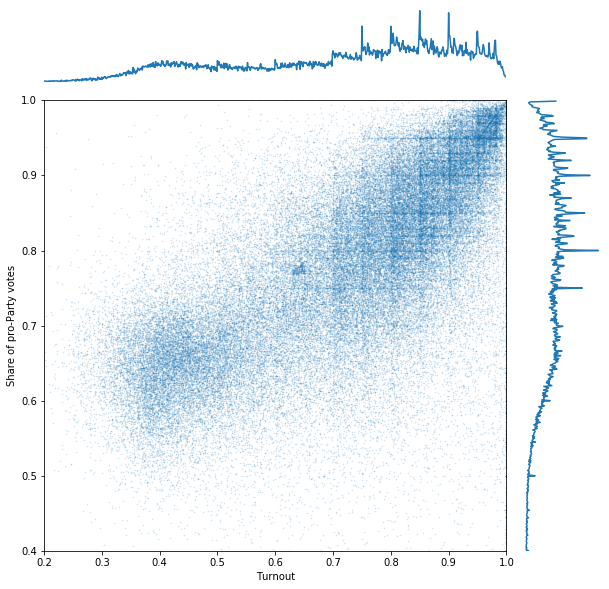

In [3]:
limits = [0.2, 0.4]
f = plt.figure(figsize=(10,10), facecolor='white')
gs = f.add_gridspec(6, 6)

ax = f.add_subplot(gs[0, :-1])
x = np.histogram(df['turnout'].values, bins=1000, range=(0,1))
ax.plot(x[1][:-2], x[0][:-1]); # Very last bin is full of 100% for tiny polling points
ax.axis('off')
plt.xlim(limits[0], 1);

ax = f.add_subplot(gs[1:, -1])
x = np.histogram(df['support'].values, bins=1000, range=(0,1))
ax.plot(x[0][:], x[1][:-1]); # Very last bin is full of 100% for tiny polling points
ax.axis('off')
plt.ylim(limits[1], 1);

ax = f.add_subplot(gs[1:, :-1])
ax.plot(df['turnout'], df['support'], '.', markersize=1, alpha=0.2);
plt.xlabel('Turnout');
plt.ylabel('Share of pro-Party votes');
plt.xlim(limits[0], 1);
plt.ylim(limits[1], 1);

In [36]:
def latinize(s):
    """Latinsca"""
    a1 = 'абвгдежзиклмнопрстуфхцчшщэюяьъый'
    a2 = "a b v g d e zh z i k l m n o p r s t u f h ts ch sh sch e yu ya ' ' y y"
    a1 = a1 + a1.upper()
    a2 = a2 + ' ' + a2.upper()
    a2 = a2.split(' ')
    t = {a1[i]: a2[i] for i in range(len(a1))}
    return ''.join([t[c] if c in t else c for c in s])
    
latinize('Уфа1')

'Ufa1'

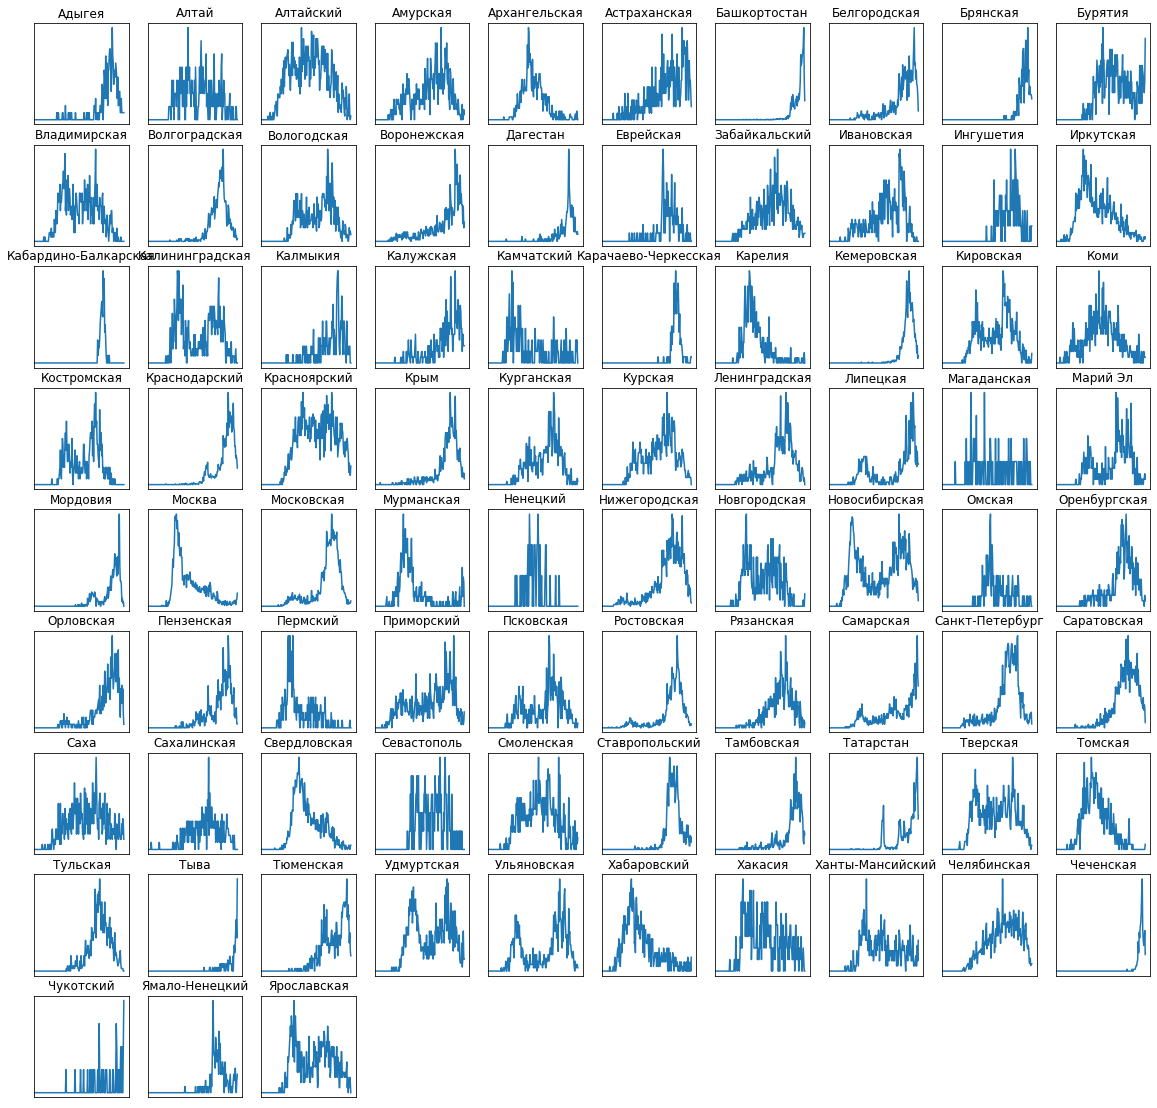

In [4]:
# Distributions by region
regions = np.unique(df['region'].values)
if False: # If we want to sort them by party support
    dfsum = df.groupby('region').agg({'turnout': [np.mean]})
    ind = np.argsort(dfsum.iloc[:,0].values) # Indices from lowest mean turnout to highest
    regions = regions[ind]

plt.figure(figsize=(20,22))
for i in range(len(regions)):
    region = regions[i]
    x = np.histogram(df['turnout'][df['region']==region].values, bins=200, range=(0,1))
    plt.subplot(10, 10, i+1);
    plt.plot(x[1][:-2], x[0][:-1]/np.max(x[0][:-1]));
    plt.xticks([])
    plt.yticks([])
    plt.xlim(0.1)
    plt.title(region)

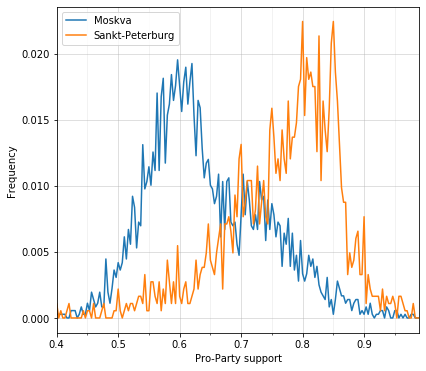

In [52]:
# One region of interest

#regions = ['Краснодарский', 'Ростовская', 'Ставропольский']
#category = 'turnout'

#regions = ['Московская', 'Санкт-Петербург']

regions = ['Москва', 'Санкт-Петербург']
#regions = ['Пермский']
category = 'support'

plt.figure(figsize=(6.5, 6), facecolor='white')
ax = plt.subplot(111)
for region_name in regions:
    df1 = df[:][df.region == region_name]        
    x = np.histogram(df1[category].values, bins=300, range=(0,1))
    plt.plot(x[1][:-1], x[0]/np.sum(x[0]), label=latinize(region_name))
    ax.set_xticks(np.arange(0,1.1,0.1))
    ax.set_xticks(np.arange(0,1,0.05), minor=True)
    plt.grid(which='minor', alpha=0.2)
    plt.grid(which='major', alpha=0.5)
    if category=='support':
        plt.xlabel('Pro-Party support')
    else:
        plt.xlabel('Turnout')
    plt.ylabel('Frequency')
    #plt.title(region_name);
plt.xlim(0.4, 0.99)
plt.legend(loc='upper left');

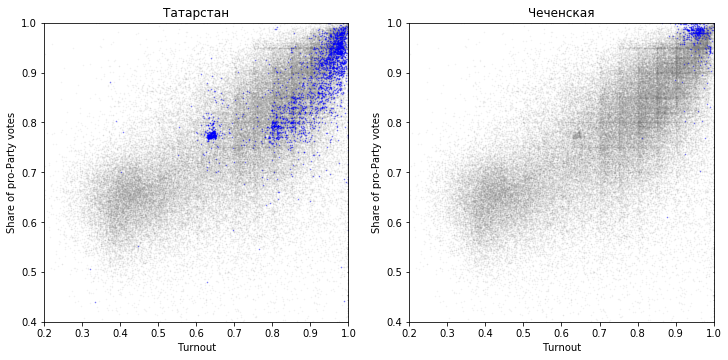

In [46]:
# Selected regions only

regions = ['Татарстан', 'Чеченская']

limits = [0.2, 0.4]
f = plt.figure(figsize=(12,5.5), facecolor='white')

for i in range(len(regions)):
    plt.subplot(1,len(regions),i+1);
    region = regions[i]
    ind = (df.region == region)
    plt.plot(df.turnout, df.support, '.', markersize=1, color='gray', alpha=0.1);
    plt.plot(df[ind].turnout, df[ind].support, '.', markersize=1, color='blue', alpha=0.5);
    plt.xlabel('Turnout');
    plt.ylabel('Share of pro-Party votes');
    plt.xlim(limits[0], 1);
    plt.ylim(limits[1], 1);
    plt.title(region);

In [7]:
filt = np.logical_and(df1.support>0.715, df1.support<0.73)
temp = df1[filt]
temp.iloc[np.argsort(temp.support.values)]

,region,tik,uik,nominal,given,received,damaged,yes,no,turnout,support
48871,Московская,58 Серпуховская городская,2906,1328,1109,1109,37,793,279,0.835090,0.715059
48980,Московская,60 Солнечногорская,2998,1279,551,551,5,394,152,0.430805,0.715064
47573,Московская,37 Можайская городская,1595,704,544,544,3,389,152,0.772727,0.715074
46553,Московская,12 Егорьевская городская,530,509,358,358,3,256,99,0.703340,0.715084
48681,Московская,56 Сергиево-Посадская,2748,1389,467,466,5,334,127,0.336213,0.715203
...,...,...,...,...,...,...,...,...,...,...,...
48811,Московская,56 Сергиево-Посадская,4069,1230,725,723,3,529,191,0.589431,0.729655
48919,Московская,58 Серпуховская городская,2956,2000,1280,1280,49,934,297,0.640000,0.729688
46527,Московская,12 Егорьевская городская,498,1404,718,718,4,524,190,0.511396,0.729805
47137,Московская,28 Красногорская городская,1219,1417,1044,1044,6,762,276,0.736768,0.729885
